In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1. Membaca dataset
df = pd.read_csv(r"C:\Users\OPTION\Downloads\Python DA\[BELUM] Projects 6_Credit Risk Analyst By Alfin Bahru Rahmika Umar\credit_risk.csv")
df

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,32576,57,53000,MORTGAGE,1.0,PERSONAL,5800,13.16,0,0.11,N,30
32577,32577,54,120000,MORTGAGE,4.0,PERSONAL,17625,7.49,0,0.15,N,19
32578,32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,35000,10.99,1,0.46,N,28
32579,32579,56,150000,MORTGAGE,5.0,PERSONAL,15000,11.48,0,0.10,N,26


In [3]:
# Menampilkan informasi dasar
print("Dimensi awal dataset:", df.shape)

Dimensi awal dataset: (32581, 12)


In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              32581 non-null  int64  
 1   Age             32581 non-null  int64  
 2   Income          32581 non-null  int64  
 3   Home            32581 non-null  object 
 4   Emp_length      31686 non-null  float64
 5   Intent          32581 non-null  object 
 6   Amount          32581 non-null  int64  
 7   Rate            29465 non-null  float64
 8   Status          32581 non-null  int64  
 9   Percent_income  32581 non-null  float64
 10  Default         32581 non-null  object 
 11  Cred_length     32581 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 3.0+ MB


,Id,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Cred_length
count,32581.000000,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,16290.006139,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,9405.479594,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,0.000000,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,8145.000000,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,16290.000000,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,24435.000000,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,32780.000000,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [6]:
# Simpan salinan data sebelum cleaning untuk perbandingan
df_before = df.copy()

In [7]:
# --- Deteksi Duplikat dan Missing Values ---
print("Shape awal:", df.shape)
print("Jumlah data duplikat:", df.duplicated().sum())
print("Jumlah missing values per kolom:\n", df.isnull().sum())

Shape awal: (32581, 12)
Jumlah data duplikat: 0
Jumlah missing values per kolom:
 Id                   0
Age                  0
Income               0
Home                 0
Emp_length         895
Intent               0
Amount               0
Rate              3116
Status               0
Percent_income       0
Default              0
Cred_length          0
dtype: int64


In [8]:
# Hapus data duplikat
df = df.drop_duplicates()
# Hapus baris dengan missing values (bisa juga menggunakan imputasi jika diperlukan)
df = df.dropna()

In [9]:
# --- Deteksi dan Penghapusan Outlier ---
# Fungsi untuk menghapus outlier berdasarkan metode IQR untuk kolom numerik
def remove_outliers(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

In [10]:
# Tentukan kolom numerik (abaikan kolom Id jika dianggap identifier)
num_cols = ['Age', 'Income', 'Emp_length', 'Amount', 'Rate', 'Percent_income', 'Cred_length']
df_clean = remove_outliers(df, num_cols)
print("Shape setelah cleaning:", df_clean.shape)

Shape setelah cleaning: (23075, 12)


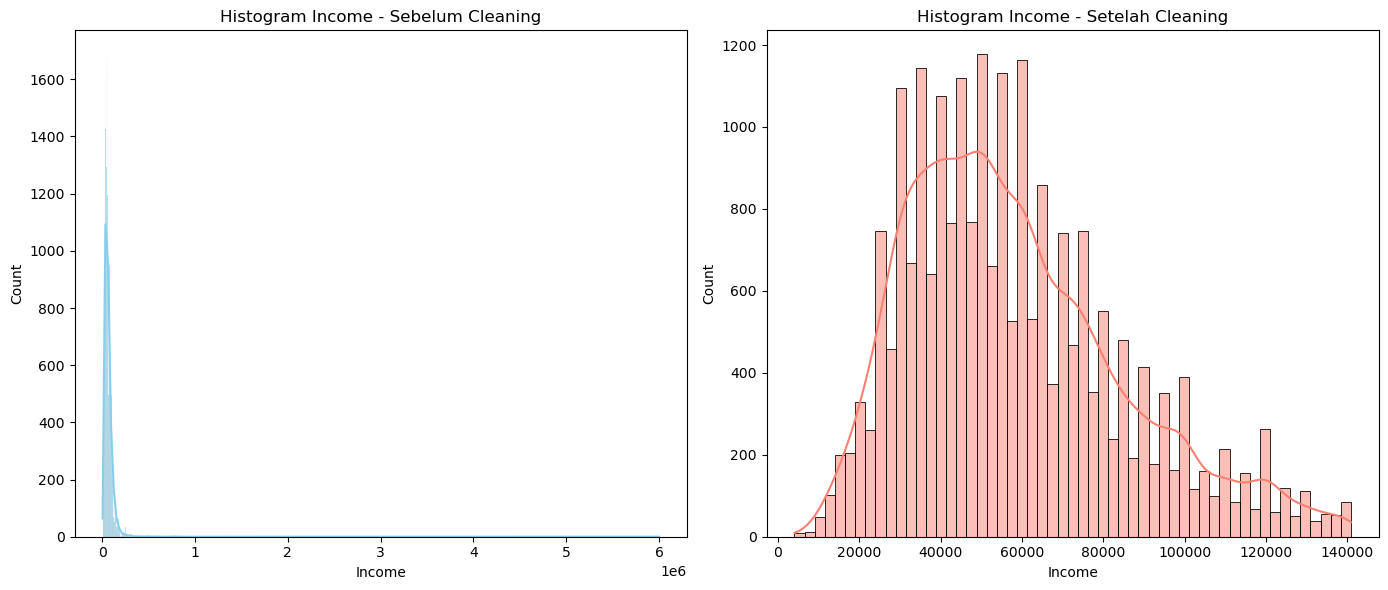

In [11]:
# --- Visualisasi perbandingan sebelum dan sesudah cleaning ---
# Histogram perbandingan untuk kolom 'Income'
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_before['Income'], kde=True, color='skyblue')
plt.title('Histogram Income - Sebelum Cleaning')

plt.subplot(1, 2, 2)
sns.histplot(df_clean['Income'], kde=True, color='salmon')
plt.title('Histogram Income - Setelah Cleaning')
plt.tight_layout()
plt.show()

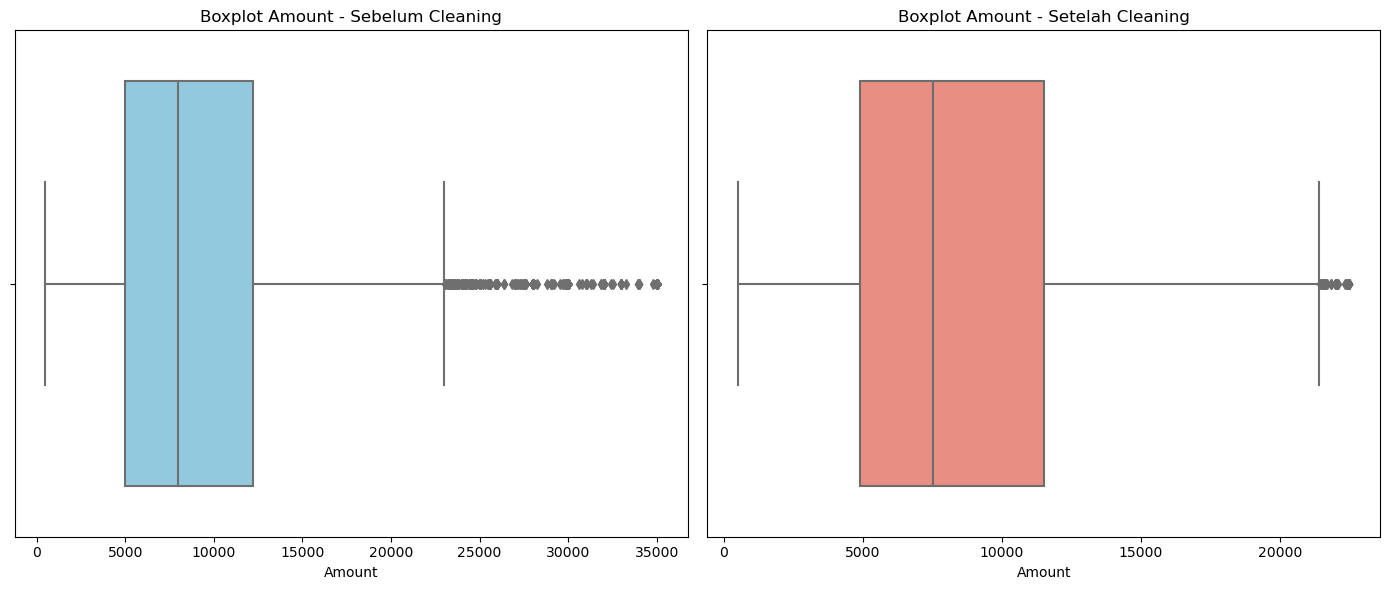

In [12]:
# Boxplot perbandingan untuk kolom 'Amount'
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df_before['Amount'], color='skyblue')
plt.title('Boxplot Amount - Sebelum Cleaning')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_clean['Amount'], color='salmon')
plt.title('Boxplot Amount - Setelah Cleaning')
plt.tight_layout()
plt.show()

In [13]:
# Simpan dataset yang sudah dibersihkan
df_clean.to_csv('credit_risk-CLEANED.csv', index=False)

In [14]:
# Menghitung metrik terukur
total_applicants = df_clean.shape[0]
avg_interest_rate = df_clean['Rate'].mean()
avg_credit_history = df_clean['Cred_length'].mean()
avg_income = df_clean['Income'].mean()
avg_amount = df_clean['Amount'].mean()

print("Jumlah pemohon kredit:", total_applicants)
print("Rata-rata suku bunga:", avg_interest_rate)
print("Rata-rata lama riwayat kredit:", avg_credit_history)
print("Rata-rata pendapatan pemohon:", avg_income)
print("Rata-rata harga kredit (Amount):", avg_amount)

Jumlah pemohon kredit: 23075
Rata-rata suku bunga: 10.932423835319609
Rata-rata lama riwayat kredit: 4.827692307692308
Rata-rata pendapatan pemohon: 58139.995276273025
Rata-rata harga kredit (Amount): 8395.622968580716


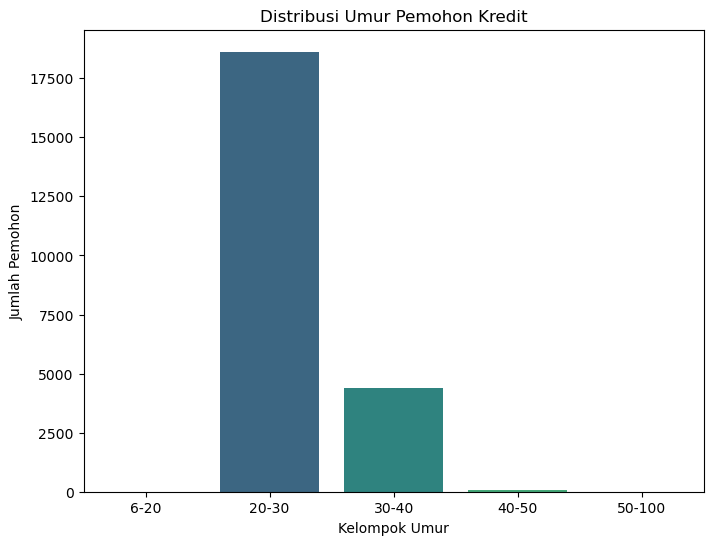

In [15]:
# --- Bar Chart Distribusi Umur ---
# Membuat kelompok umur
bins = [6, 20, 30, 40, 50, 100]
labels = ['6-20', '20-30', '30-40', '40-50', '50-100']
df_clean['Age_Group'] = pd.cut(df_clean['Age'], bins=bins, labels=labels, right=False)
age_group_counts = df_clean['Age_Group'].value_counts().sort_index()

plt.figure(figsize=(8,6))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='viridis')
plt.xlabel('Kelompok Umur')
plt.ylabel('Jumlah Pemohon')
plt.title('Distribusi Umur Pemohon Kredit')
plt.show()

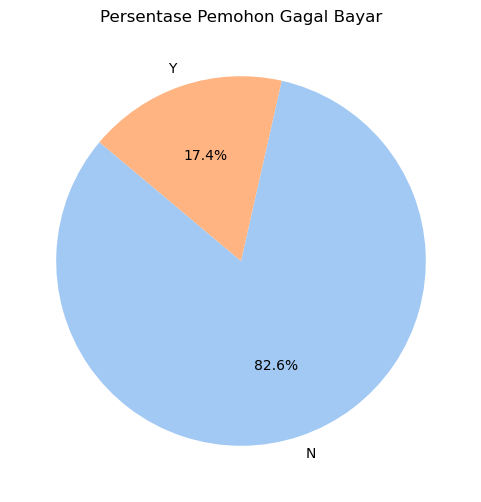

In [16]:
# --- Pie Chart Persentase Gagal Bayar ---
# Asumsi kolom 'Default' berisi nilai 'Yes' untuk gagal bayar dan 'No' untuk tidak gagal bayar
default_counts = df_clean['Default'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(default_counts, labels=default_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Persentase Pemohon Gagal Bayar')
plt.show()

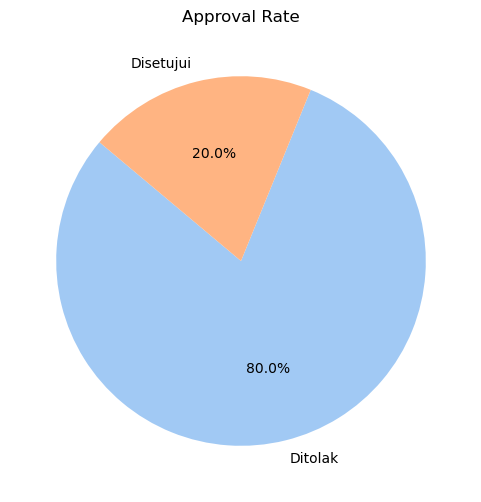

In [17]:
# --- Pie Chart Approval Rate ---
# Asumsi kolom 'Status' dimana 1 = disetujui, 0 = tidak disetujui
status_counts = df_clean['Status'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(status_counts, labels=['Disetujui' if x==1 else 'Ditolak' for x in status_counts.index], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Approval Rate')
plt.show()

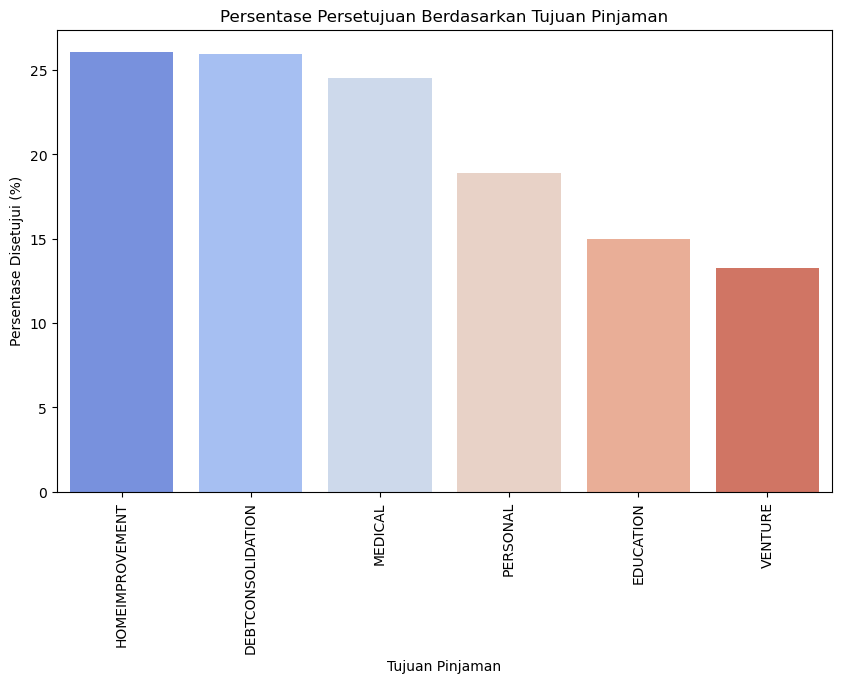

In [20]:
# --- Bar Chart Persentase Persetujuan Berdasarkan Tujuan Pinjaman (Intent) ---
# Menghitung persentase persetujuan per kategori 'Intent'
approval_by_intent = df_clean.groupby('Intent')['Status'].apply(lambda x: (x==1).mean()*100).reset_index()
approval_by_intent = approval_by_intent.sort_values('Status', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Intent', y='Status', data=approval_by_intent, palette='coolwarm')
plt.xlabel('Tujuan Pinjaman')
plt.ylabel('Persentase Disetujui (%)')
plt.title('Persentase Persetujuan Berdasarkan Tujuan Pinjaman')
plt.xticks(rotation=90)
plt.show()


In [19]:
# import streamlit as st
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Membaca data yang sudah dibersihkan
# df = pd.read_csv('credit_risk-CLEANED.csv')

# st.title("Dashboard Analisis Kredit")

# # --- Metrik Utama ---
# total_applicants = df.shape[0]
# avg_interest_rate = df['Rate'].mean()
# avg_credit_history = df['Cred_length'].mean()
# avg_income = df['Income'].mean()
# avg_amount = df['Amount'].mean()

# st.header("Metrik Utama")
# st.write(f"**Jumlah Pemohon Kredit:** {total_applicants}")
# st.write(f"**Rata-rata Suku Bunga:** {avg_interest_rate:.2f}")
# st.write(f"**Rata-rata Lama Riwayat Kredit:** {avg_credit_history:.2f}")
# st.write(f"**Rata-rata Pendapatan Pemohon:** {avg_income:.2f}")
# st.write(f"**Rata-rata Harga Kredit (Amount):** {avg_amount:.2f}")

# # --- Distribusi Umur ---
# st.header("Distribusi Umur Pemohon Kredit")
# bins = [6, 20, 30, 40, 50, 100]
# labels = ['6-20', '20-30', '30-40', '40-50', '50-100']
# df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
# age_group_counts = df['Age_Group'].value_counts().sort_index()

# fig1, ax1 = plt.subplots()
# sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='viridis', ax=ax1)
# ax1.set_xlabel('Kelompok Umur')
# ax1.set_ylabel('Jumlah Pemohon')
# ax1.set_title('Distribusi Umur')
# st.pyplot(fig1)

# # --- Pie Chart Gagal Bayar ---
# st.header("Persentase Pemohon Gagal Bayar")
# default_counts = df['Default'].value_counts()
# fig2, ax2 = plt.subplots()
# ax2.pie(default_counts, labels=default_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
# ax2.set_title('Gagal Bayar')
# st.pyplot(fig2)

# # --- Pie Chart Approval Rate ---
# st.header("Approval Rate")
# status_counts = df['Status'].value_counts()
# approval_labels = ['Disetujui' if x==1 else 'Ditolak' for x in status_counts.index]
# fig3, ax3 = plt.subplots()
# ax3.pie(status_counts, labels=approval_labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
# ax3.set_title('Approval Rate')
# st.pyplot(fig3)

# # --- Bar Chart Persentase Approval Berdasarkan Tujuan Pinjaman ---
# st.header("Approval Berdasarkan Tujuan Pinjaman")
# approval_by_intent = df.groupby('Intent')['Status'].apply(lambda x: (x==1).mean()*100).reset_index()
# approval_by_intent = approval_by_intent.sort_values('Status', ascending=False)

# fig4, ax4 = plt.subplots(figsize=(10,6))
# sns.barplot(x='Intent', y='Status', data=approval_by_intent, palette='coolwarm', ax=ax4)
# ax4.set_xlabel('Tujuan Pinjaman')
# ax4.set_ylabel('Persentase Disetujui (%)')
# ax4.set_title('Approval Berdasarkan Tujuan Pinjaman')
# ax4.tick_params(axis='x', rotation=45)
# st.pyplot(fig4)
